In [ ]:
%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW

from review.utils.plotfunctions import plot_3d_solution
from review.utils.constants import ThreeDimExploration, Cases 
from review.lateral.solver import Steady3DSolver
from review.utils.homogeneous import homogeneous_solution 

from matplotlib import pyplot as plt
import numpy as np

def solve(case: str, version: str):
    cases = Cases()
    constants = ThreeDimExploration()
    filename = constants.get_base_path(version) / f"solution{case}.bp"

    solver = Steady3DSolver(cases.get_case_params(case),
                            constants.get_plug_radius(version),
                            constants.get_stomatal_radius(version),
                            constants.get_mesh_path(version),
                            constants.stomatal_epsilon,
                            filename = filename,
                            order = 1,
                            rho = (1.0, 1.0, 0.6),
                            extract_profile=True)

    return solver.solve()


def plot(case: str, version: str):
    constants = ThreeDimExploration()
    filename = constants.get_base_path(version) / f"solution{case}.bp"
    plot_3d_solution(filename)


def saturate_3d1d_comparison_scan():
    for case in ["A", "B", "C", "D", "E"]:
        for version in ["low", "typical", "high"]:
            an3d, z, chi, chi_std = solve(case, version)
            print(z.shape, chi.shape, chi_std.shape)
            print(np.vstack((z, chi, chi_std)).T.shape)
            np.savetxt(f"files/lateral_scanning/{version}/solution{case}_profile.txt", np.vstack((z, chi, chi_std)).T, delimiter=";")

# saturate_3d1d_comparison_scan()
         

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW
Info    : Reading '/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW/files/meshes/cylinder_low.msh'...
Info    : 10 entities
Info    : 21855 nodes
Info    : 130696 elements
Info    : Done reading '/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW/files/meshes/cylinder_low.msh'         
(50,) (50,) (50,)
(50, 3)
Info    : Reading '/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW/files/meshes/cylinder_typical.msh'...
Info    : 10 entities
Info    : 12288 nodes
Info    : 73438 elements
Info    : Done reading '/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW/files/meshes/cylinder_typical.msh'
(50,) (50,) (50,)
(50, 3)
Info    : Reading '/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW/files/meshes/cylinder_high.msh'...
Info    : 10 entities
Info    : 8619 nodes
Info    : 51612 elements
Info    : Done reading '/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW/files/meshes/cylinder_high.msh'
(50,) (50,) (50,)
(50, 3)
Info    : Reading '/ho

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW


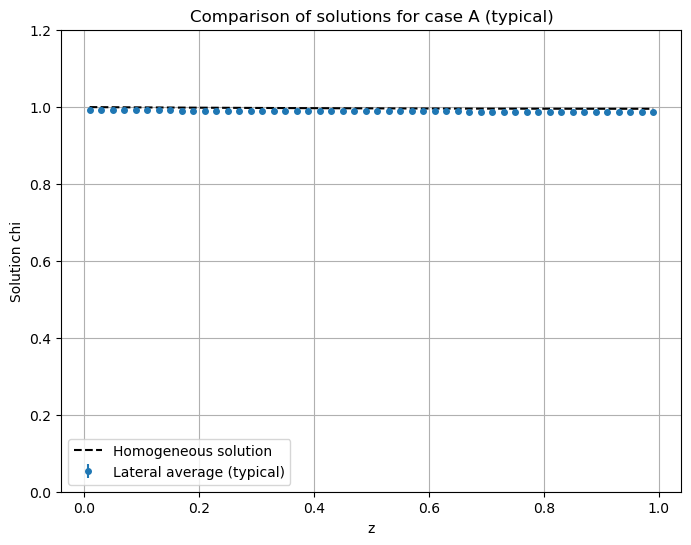

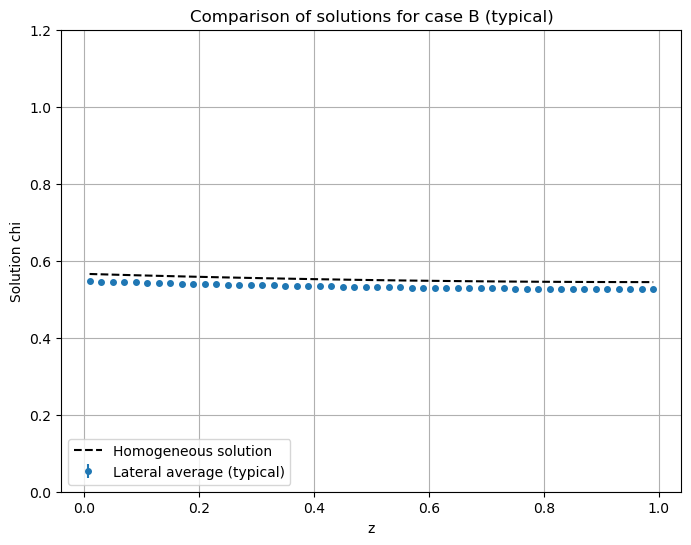

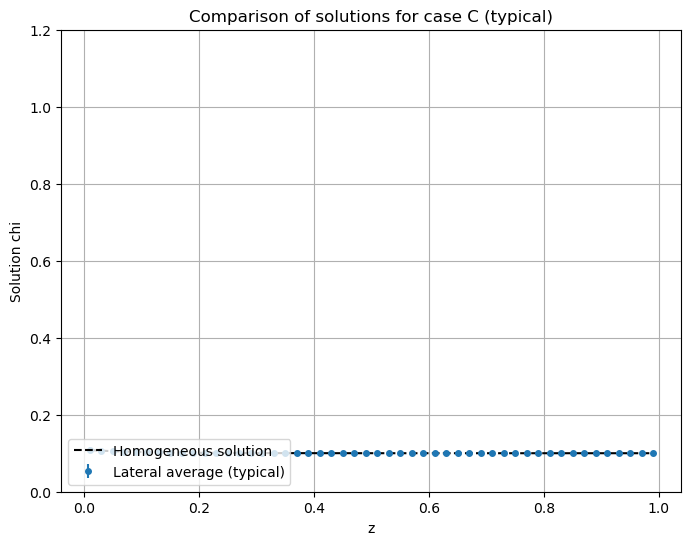

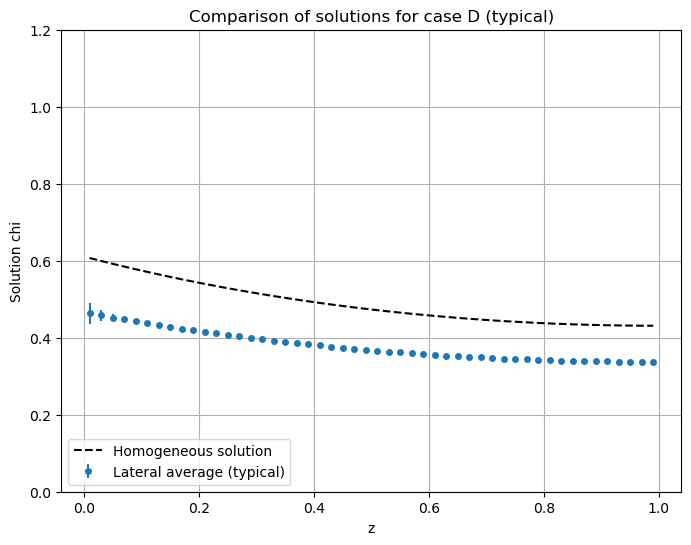

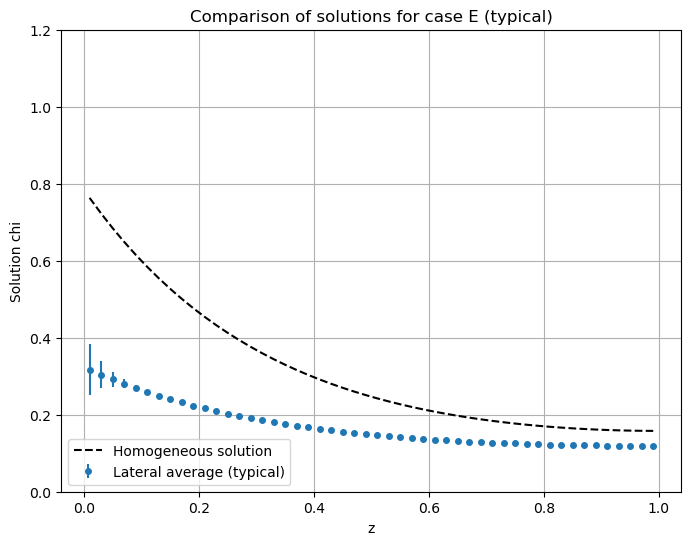

In [ ]:

constants = ThreeDimExploration() 

versions = ["low", "typical", "high"]
cases = ["A", "B", "C", "D", "E"]



def plot_1d_comparison(case: str, version: str) -> None:
    filename = f"files/lateral_scanning/{version}/solution{case}_profile.txt"
    data = np.loadtxt(filename, delimiter=";")
    z = data[:, 0]
    chi_mean = data[:, 1]
    chi_std = data[:, 2]
    #
    cases = Cases() 
    tau, gamma, chi_ = cases.get_case_params(case)
    chi_hom = homogeneous_solution(z, (tau, gamma, chi_)) 
    #
    # rewrite with fig, ax = plt.subplots()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(z, chi_hom, label="Homogeneous solution", color="black", linestyle="--")
    ax.errorbar(z, chi_mean, yerr=chi_std, label=f"Lateral average ({version})", fmt='o', markersize=4)
    ax.set_xlabel("z")
    ax.set_ylabel("Solution chi")
    ax.set_title(f"Comparison of solutions for case {case} ({version})")
    ax.set_ylim(0, 1.2)
    ax.legend(loc="lower left")
    ax.grid()
    plt.show() 

for case in cases:
    plot_1d_comparison(case, "typical")

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW
Version: low, Plug radius: 0.0761 Stomatal radius: 0.0084
Version: typical, Plug radius: 0.1521 Stomatal radius: 0.0168
Version: high, Plug radius: 0.3043 Stomatal radius: 0.0335


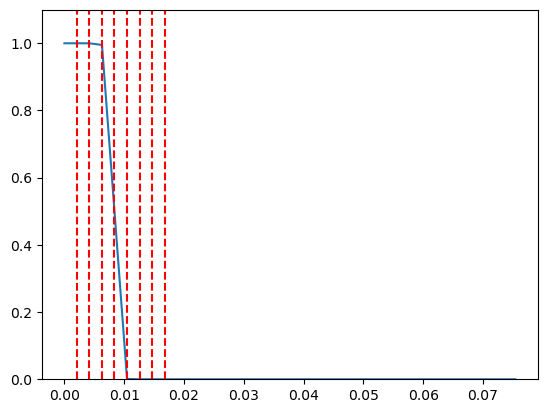

In [20]:
%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW

import matplotlib.pyplot as plt 
import numpy as np
from review.utils.constants import ThreeDimExploration
constants = ThreeDimExploration()

for version in constants.allowed:
    plug = constants.get_plug_radius(version)
    stomata = constants.get_stomatal_radius(version)
    print(f"Version: {version}, Plug radius: {plug:.4f}", f"Stomatal radius: {stomata:.4f}")

version = "low"
plug = constants.get_plug_radius(version)
stomata = constants.get_stomatal_radius(version)

epsilon = 0.002
x = np.arange(0, plug, stomata  / 4.0)
phi = x**2 - stomata**2 
gs = 0.5 * (1 - np.tanh(phi / epsilon / plug**2))


plt.plot(x, gs)
plt.ylim(0, 1.1)
for i in range(8):
    plt.vlines(stomata / 4 * (i+1), 0, 1.1, colors='red', linestyles='dashed')